In [3]:
import pandas as pd
import missingno as msno
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
folder_name = '../Inputs/'
file_name = 'dataset_SCL.csv'
df = pd.read_csv(folder_name + file_name)

## Inspección de formato de los datos

In [7]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [17]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [8]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

- Fecha-I: Scheduled date and time of the flight.
- Vlo-I : Scheduled flight number.
- Ori-I : Programmed origin city code.
- Des-I : Programmed destination city code.
- Emp-I : Scheduled flight airline code.
- Fecha-O : Date and time of flight operation.
- Vlo-O : Flight operation number of the flight.
- Ori-O : Operation origin city code
- Des-O : Operation destination city code.
- Emp-O : Airline code of the operated flight.
- DIA: Day of the month of flight operation.
- MES : Number of the month of operation of the flight.
- AÑO : Year of flight operation.
- DIANOM : Day of the week of flight operation.
- TIPOVUELO : Type of flight, I =International, N =National.
- OPERA : Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.

In [17]:
df.groupby(["Des-I",'SIGLADES'],as_index=False)['SIGLADES'].nunique().SIGLADES.max()

1

In [36]:
df[~df.isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


<Axes: >

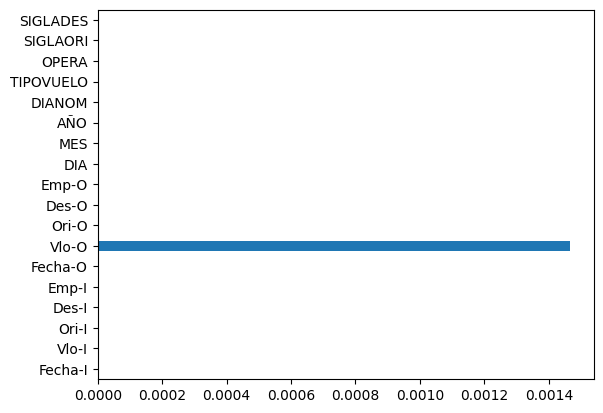

In [33]:
(df.isnull().sum()/df.shape[0]*100).plot.barh()

In [27]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [12]:
df.groupby(["Ori-I",'SIGLAORI']).size()

Ori-I  SIGLAORI
SCEL   Santiago    68206
dtype: int64

In [23]:
df["Fecha-I"] = df["Fecha-I"].sort_values()

Timedelta('32 days 22:15:00')